# Movie Recommendation System 
## Content Based Filtering

## Load the dataset

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
movies = pd.read_csv('movies_dataset/movies_metadata.csv')
credits = pd.read_csv('movies_dataset/credits.csv')

In [3]:
movies.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [4]:
credits.head()

,cast,crew,id
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602
3,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",31357
4,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862


In [5]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

In [6]:
movies.shape

(45466, 24)

In [7]:
credits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45476 entries, 0 to 45475
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   cast    45476 non-null  object
 1   crew    45476 non-null  object
 2   id      45476 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 1.0+ MB


In [8]:
credits.shape

(45476, 3)

In [9]:
movies_df = movies.drop_duplicates()
credits_df = credits.drop_duplicates()

## Concate dataset

In [10]:
concat_data = pd.concat([movies_df,credits_df],axis=1)
concat_data.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,spoken_languages,status,tagline,title,video,vote_average,vote_count,cast,crew,id
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",31357.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862.0


## Exploratory data analysis

#### Q1. Which are the movies that have the highest budget?

In [11]:
high_budget_movie = movies_df.groupby('title')['budget'].sum().sort_values(ascending=False)[:10].reset_index()

In [12]:
high_budget_movie['budget'] = high_budget_movie['budget'].astype('int64')

In [13]:
# here are the top 10 highest budget movies
top_10_high_budget_movie = high_budget_movie.sort_values(by=['budget'], ascending=False).reset_index(drop=True)
top_10_high_budget_movie

,title,budget
0,The Peanuts Movie,99000000
1,The Mummy Returns,98000000
2,Cutthroat Island,98000000
3,Friend Request,9900000
4,Don't Breathe,9900000
5,Elle,9804690
6,Revolutionary Girl Utena: The Movie,998000
7,Life Feels Good,996519
8,Kidulthood,994000
9,BMX Bandits,980385


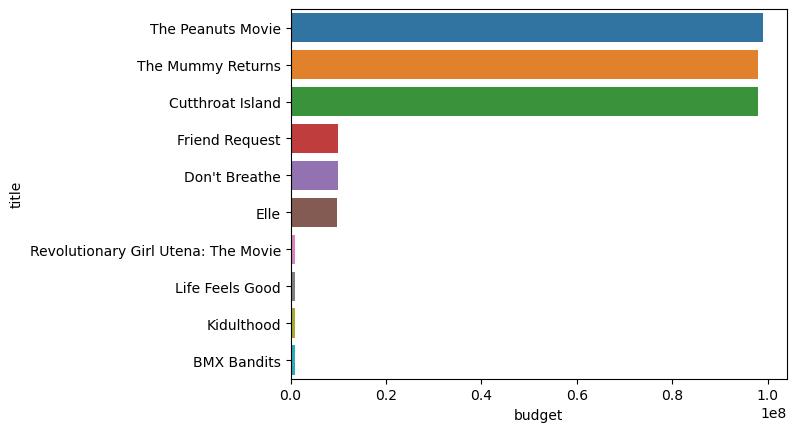

In [14]:
sns.barplot(x=top_10_high_budget_movie['budget'], y=top_10_high_budget_movie['title']);

## Feature Engineering

In [20]:
sample_data = concat_data.sample(10000)

In [22]:
sample_data.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count', 'cast', 'crew', 'id'],
      dtype='object')

In [23]:
df_movies = sample_data[['id','title','overview','genres','cast','crew']]

In [24]:
df_movies.head()

,id,id,title,overview,genres,cast,crew
19359,79694,79694.0,The Apparition,Plagued by frightening occurrences in their ho...,"[{'id': 27, 'name': 'Horror'}, {'id': 53, 'nam...","[{'cast_id': 1019, 'character': 'Kelly', 'cred...","[{'credit_id': '52fe49e0c3a368484e144eb1', 'de..."
42460,169885,269198.0,Flight of the Butterflies,It takes two or three generations for the mona...,"[{'id': 99, 'name': 'Documentary'}]","[{'cast_id': 5, 'character': 'Leo Pfeffer', 'c...","[{'credit_id': '53a9ddf50e0a2646c20002ef', 'de..."
15143,40594,40594.0,Julia Sweeney - Letting Go of God,Julia Sweeney's third autobiographical monolog...,"[{'id': 35, 'name': 'Comedy'}, {'id': 99, 'nam...","[{'cast_id': 1, 'character': 'herself', 'credi...","[{'credit_id': '52fe4599c3a36847f80d0339', 'de..."
13734,15588,15588.0,OSS 117: Lost in Rio,"French top secret agent, Hubert Bonisseur de l...","[{'id': 80, 'name': 'Crime'}, {'id': 28, 'name...","[{'cast_id': 4, 'character': 'Hubert Bonisseur...","[{'credit_id': '59cbc2fac3a3687797013e24', 'de..."
13972,13730,13730.0,Black Box,An accident survivor wakes from a coma and con...,"[{'id': 9648, 'name': 'Mystery'}, {'id': 53, '...","[{'cast_id': 2, 'character': 'Arthur Seligman'...","[{'credit_id': '52fe45929251416c7505b129', 'de..."


In [25]:
# drop dupticate columns
df_movies = df_movies.loc[:, ~df_movies.columns.duplicated()]
df_movies.head()

,id,title,overview,genres,cast,crew
19359,79694,The Apparition,Plagued by frightening occurrences in their ho...,"[{'id': 27, 'name': 'Horror'}, {'id': 53, 'nam...","[{'cast_id': 1019, 'character': 'Kelly', 'cred...","[{'credit_id': '52fe49e0c3a368484e144eb1', 'de..."
42460,169885,Flight of the Butterflies,It takes two or three generations for the mona...,"[{'id': 99, 'name': 'Documentary'}]","[{'cast_id': 5, 'character': 'Leo Pfeffer', 'c...","[{'credit_id': '53a9ddf50e0a2646c20002ef', 'de..."
15143,40594,Julia Sweeney - Letting Go of God,Julia Sweeney's third autobiographical monolog...,"[{'id': 35, 'name': 'Comedy'}, {'id': 99, 'nam...","[{'cast_id': 1, 'character': 'herself', 'credi...","[{'credit_id': '52fe4599c3a36847f80d0339', 'de..."
13734,15588,OSS 117: Lost in Rio,"French top secret agent, Hubert Bonisseur de l...","[{'id': 80, 'name': 'Crime'}, {'id': 28, 'name...","[{'cast_id': 4, 'character': 'Hubert Bonisseur...","[{'credit_id': '59cbc2fac3a3687797013e24', 'de..."
13972,13730,Black Box,An accident survivor wakes from a coma and con...,"[{'id': 9648, 'name': 'Mystery'}, {'id': 53, '...","[{'cast_id': 2, 'character': 'Arthur Seligman'...","[{'credit_id': '52fe45929251416c7505b129', 'de..."


### Let's Check NaN Values

In [26]:
df_movies.isnull().sum()

id            3
title         4
overview    206
genres        3
cast          8
crew          8
dtype: int64

In [27]:
df_movies = df_movies.dropna().reset_index(drop=True)

In [28]:
df_movies.head()

,id,title,overview,genres,cast,crew
0,79694,The Apparition,Plagued by frightening occurrences in their ho...,"[{'id': 27, 'name': 'Horror'}, {'id': 53, 'nam...","[{'cast_id': 1019, 'character': 'Kelly', 'cred...","[{'credit_id': '52fe49e0c3a368484e144eb1', 'de..."
1,169885,Flight of the Butterflies,It takes two or three generations for the mona...,"[{'id': 99, 'name': 'Documentary'}]","[{'cast_id': 5, 'character': 'Leo Pfeffer', 'c...","[{'credit_id': '53a9ddf50e0a2646c20002ef', 'de..."
2,40594,Julia Sweeney - Letting Go of God,Julia Sweeney's third autobiographical monolog...,"[{'id': 35, 'name': 'Comedy'}, {'id': 99, 'nam...","[{'cast_id': 1, 'character': 'herself', 'credi...","[{'credit_id': '52fe4599c3a36847f80d0339', 'de..."
3,15588,OSS 117: Lost in Rio,"French top secret agent, Hubert Bonisseur de l...","[{'id': 80, 'name': 'Crime'}, {'id': 28, 'name...","[{'cast_id': 4, 'character': 'Hubert Bonisseur...","[{'credit_id': '59cbc2fac3a3687797013e24', 'de..."
4,13730,Black Box,An accident survivor wakes from a coma and con...,"[{'id': 9648, 'name': 'Mystery'}, {'id': 53, '...","[{'cast_id': 2, 'character': 'Arthur Seligman'...","[{'credit_id': '52fe45929251416c7505b129', 'de..."


In [29]:
df_movies.shape

(9785, 6)

### Extract genres names

In [30]:
import ast

In [31]:
def Extract_name(data):
    lst = []
    for i in ast.literal_eval(data):
        lst.append(i['name'])
        
    return lst

In [32]:
df_movies['genres'] = df_movies['genres'].apply(Extract_name)

In [33]:
df_movies['cast'] = df_movies['cast'].apply(Extract_name)

In [34]:
df_movies.head()

,id,title,overview,genres,cast,crew
0,79694,The Apparition,Plagued by frightening occurrences in their ho...,"[Horror, Thriller]","[Ashley Greene, Sebastian Stan, Tom Felton, Ju...","[{'credit_id': '52fe49e0c3a368484e144eb1', 'de..."
1,169885,Flight of the Butterflies,It takes two or three generations for the mona...,[Documentary],"[Florian Teichtmeister, Heino Ferch, Melika Fo...","[{'credit_id': '53a9ddf50e0a2646c20002ef', 'de..."
2,40594,Julia Sweeney - Letting Go of God,Julia Sweeney's third autobiographical monolog...,"[Comedy, Documentary]",[Julia Sweeney],"[{'credit_id': '52fe4599c3a36847f80d0339', 'de..."
3,15588,OSS 117: Lost in Rio,"French top secret agent, Hubert Bonisseur de l...","[Crime, Action, Comedy, Adventure]","[Jean Dujardin, Louise Monot, Pierre Bellemare...","[{'credit_id': '59cbc2fac3a3687797013e24', 'de..."
4,13730,Black Box,An accident survivor wakes from a coma and con...,"[Mystery, Thriller]","[José Garcia, Marion Cotillard, Michel Duchaus...","[{'credit_id': '52fe45929251416c7505b129', 'de..."


In [35]:
# get top 3 cast 
df_movies['cast'] = df_movies['cast'].apply(lambda x: x[0:3])

### Extract director name

In [36]:
def Extract_director(data):
    director_lst = []
    for i in ast.literal_eval(data):
        if i['job'] == 'Director':
            director_lst.append(i['name'])
    return director_lst

In [37]:
df_movies['crew'] = df_movies['crew'].apply(Extract_director)

In [38]:
df_movies.head()

,id,title,overview,genres,cast,crew
0,79694,The Apparition,Plagued by frightening occurrences in their ho...,"[Horror, Thriller]","[Ashley Greene, Sebastian Stan, Tom Felton]",[Todd Lincoln ]
1,169885,Flight of the Butterflies,It takes two or three generations for the mona...,[Documentary],"[Florian Teichtmeister, Heino Ferch, Melika Fo...",[Andreas Prochaska]
2,40594,Julia Sweeney - Letting Go of God,Julia Sweeney's third autobiographical monolog...,"[Comedy, Documentary]",[Julia Sweeney],[Julia Sweeney]
3,15588,OSS 117: Lost in Rio,"French top secret agent, Hubert Bonisseur de l...","[Crime, Action, Comedy, Adventure]","[Jean Dujardin, Louise Monot, Pierre Bellemare]",[Michel Hazanavicius]
4,13730,Black Box,An accident survivor wakes from a coma and con...,"[Mystery, Thriller]","[José Garcia, Marion Cotillard, Michel Duchaus...",[Richard Berry]


### Remove spaces

In [39]:
def remove_spaces(data):
    l1 = []
    for i in data:
        l1.append(i.replace(" ", ""))
    return l1

In [40]:
df_movies['cast'] = df_movies['cast'].apply(remove_spaces)
df_movies['crew'] = df_movies['crew'].apply(remove_spaces)
df_movies['genres'] = df_movies['genres'].apply(remove_spaces)

In [41]:
df_movies.head()

,id,title,overview,genres,cast,crew
0,79694,The Apparition,Plagued by frightening occurrences in their ho...,"[Horror, Thriller]","[AshleyGreene, SebastianStan, TomFelton]",[ToddLincoln]
1,169885,Flight of the Butterflies,It takes two or three generations for the mona...,[Documentary],"[FlorianTeichtmeister, HeinoFerch, MelikaForou...",[AndreasProchaska]
2,40594,Julia Sweeney - Letting Go of God,Julia Sweeney's third autobiographical monolog...,"[Comedy, Documentary]",[JuliaSweeney],[JuliaSweeney]
3,15588,OSS 117: Lost in Rio,"French top secret agent, Hubert Bonisseur de l...","[Crime, Action, Comedy, Adventure]","[JeanDujardin, LouiseMonot, PierreBellemare]",[MichelHazanavicius]
4,13730,Black Box,An accident survivor wakes from a coma and con...,"[Mystery, Thriller]","[JoséGarcia, MarionCotillard, MichelDuchaussoy]",[RichardBerry]


### Combine all features 

In [42]:
df_movies['overview'] = df_movies['overview'].apply(lambda x: x.split())

In [43]:
df_movies['movies_info'] = df_movies['overview'] + df_movies['genres'] + df_movies['cast'] + df_movies['crew']

In [44]:
df_movies.head()

,id,title,overview,genres,cast,crew,movies_info
0,79694,The Apparition,"[Plagued, by, frightening, occurrences, in, th...","[Horror, Thriller]","[AshleyGreene, SebastianStan, TomFelton]",[ToddLincoln],"[Plagued, by, frightening, occurrences, in, th..."
1,169885,Flight of the Butterflies,"[It, takes, two, or, three, generations, for, ...",[Documentary],"[FlorianTeichtmeister, HeinoFerch, MelikaForou...",[AndreasProchaska],"[It, takes, two, or, three, generations, for, ..."
2,40594,Julia Sweeney - Letting Go of God,"[Julia, Sweeney's, third, autobiographical, mo...","[Comedy, Documentary]",[JuliaSweeney],[JuliaSweeney],"[Julia, Sweeney's, third, autobiographical, mo..."
3,15588,OSS 117: Lost in Rio,"[French, top, secret, agent,, Hubert, Bonisseu...","[Crime, Action, Comedy, Adventure]","[JeanDujardin, LouiseMonot, PierreBellemare]",[MichelHazanavicius],"[French, top, secret, agent,, Hubert, Bonisseu..."
4,13730,Black Box,"[An, accident, survivor, wakes, from, a, coma,...","[Mystery, Thriller]","[JoséGarcia, MarionCotillard, MichelDuchaussoy]",[RichardBerry],"[An, accident, survivor, wakes, from, a, coma,..."


In [45]:
final_data = df_movies[['id','title','movies_info']]

In [46]:
final_data['movies_info'] = final_data['movies_info'].apply(lambda x: ' '.join(x))

In [47]:
final_data['title'] = final_data['title'].str.lower()

In [48]:
final_data.head()

,id,title,movies_info
0,79694,the apparition,Plagued by frightening occurrences in their ho...
1,169885,flight of the butterflies,It takes two or three generations for the mona...
2,40594,julia sweeney - letting go of god,Julia Sweeney's third autobiographical monolog...
3,15588,oss 117: lost in rio,"French top secret agent, Hubert Bonisseur de l..."
4,13730,black box,An accident survivor wakes from a coma and con...


## Model building

### TF-IDF Vectorizer

In [55]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [56]:
tf_vec = TfidfVectorizer(max_features=2500, stop_words='english')

# fit the data
X = tf_vec.fit_transform(final_data['movies_info']).toarray()

In [57]:
X.shape

(9785, 2500)

### Cosine Similarity                                                 

In [58]:
from sklearn.metrics.pairwise import cosine_similarity

similarity = cosine_similarity(X)

In [59]:
similarity.shape

(9785, 9785)

In [60]:
similarity

array([[1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.02019275],
       [0.        , 1.        , 0.10060884, ..., 0.11192872, 0.        ,
        0.        ],
       [0.        , 0.10060884, 1.        , ..., 0.00921681, 0.08550174,
        0.        ],
       ...,
       [0.        , 0.11192872, 0.00921681, ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.08550174, ..., 0.        , 1.        ,
        0.        ],
       [0.02019275, 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [61]:
def Recommend_movies(movie_name):
    movie = movie_name.lower()
    if movie not in final_data['title'].unique():
        print(f"Sorry! The movie {movie} you requested is not found in our database. Please check the spelling or try with some other movies")
    else:
        index_val = final_data[final_data['title'] == movie].index[0]
        similar_movies = sorted(list(enumerate(similarity[index_val])),reverse=True, key=lambda x:x[1])
        recommeded_movies = []
        for i in similar_movies[0:8]:
            recommeded_movies.append(final_data.iloc[i[0]].title)
            
        return recommeded_movies

In [71]:
Recommend_movies('the apparition')

['the apparition',
 'are you here',
 'man of the house',
 'song of the sea',
 'trapped in the closet: chapters 1-12',
 'the rawhide years',
 "the possession of david o'reilly",
 'alien apocalypse']

In [72]:
import pickle

In [73]:
pickle.dump(final_data,open('movies1.pkl', 'wb'))
pickle.dump(similarity,open('similarity1.pkl','wb'))

In [74]:
%%time
data = pickle.load(open('similarity1.pkl', 'rb'))

CPU times: total: 562 ms
Wall time: 613 ms


In [76]:
data.shape

(9785, 9785)